In [1]:
# Run the below code in the terminal to install the SOMPY package
# git clone https://github.com/hhl60492/SOMPY_robust_clustering.git
# cd path/to/the/cloned/folder/
# python setup.py install

In [2]:
import sys
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import joblib
sys.path.append('/Users/vishwajit/Desktop/SOMPY_robust_clustering-master/') #path/to/the/cloned/folder/
import sompy
from sompy.sompy import SOMFactory
from sompy.visualization import mapview
from sompy.visualization.umatrix import UMatrixView
from sompy.visualization.hitmap import HitMapView

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [39]:
df = pd.read_csv('Cleaned_percent_data.csv',index_col='zip code tabulation area')

In [4]:
df.shape

(33120, 238)

In [5]:
sm = SOMFactory().build(df.values, normalization = 'var', initialization='pca')
sm.train(n_job=1, verbose=False, train_rough_len=2, train_finetune_len=5)
# Takes around 8-10 minutes of time to run
# No need to initialize number of nodes as it is calculated based on the eigenvalues of the matrix

In [6]:
sm.codebook.mapsize
# There are total of 918 nodes (34 horizontal and 27 vertical), each node has a weight of length 238.

[27, 34]

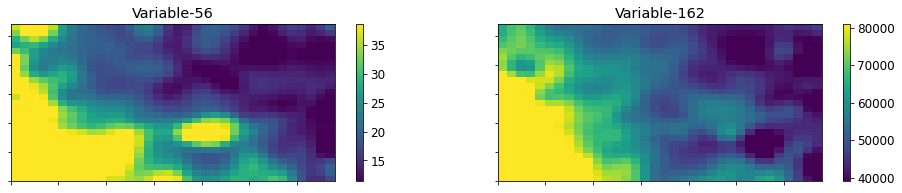

In [7]:
view2D  = mapview.View2D(10,10,"rand data",text_size=12)
view2D.show(sm, col_sz=2, which_dim=[55,161], desnormalize=True)
#which_dim takes a list of attributes/variables to be visualized using colormap.
#Variable-56 corresponds to percentage of population with Bachelor's degree or higher
#and Variable-162 to the median household income. As expected both the colormaps look similar. 

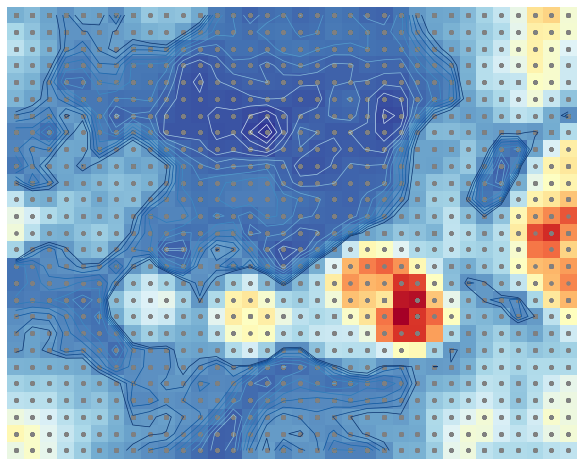

In [8]:
umat  = UMatrixView(width=10,height=10,title='U-matrix')
UMatrix = umat.show(sm)
#UMatrix contains distance between neighboring nodes. Red regions are the ones with large distances
#whereas blue with smaller distances between neighbors.
#This helps in identifying regions with dense clusters(smaller distances)

Performing K-means SSE elbow sweep...


/Users/vishwajit/Desktop/SOMPY_robust_clustering-master/sompy/visualization/hitmap.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(111)


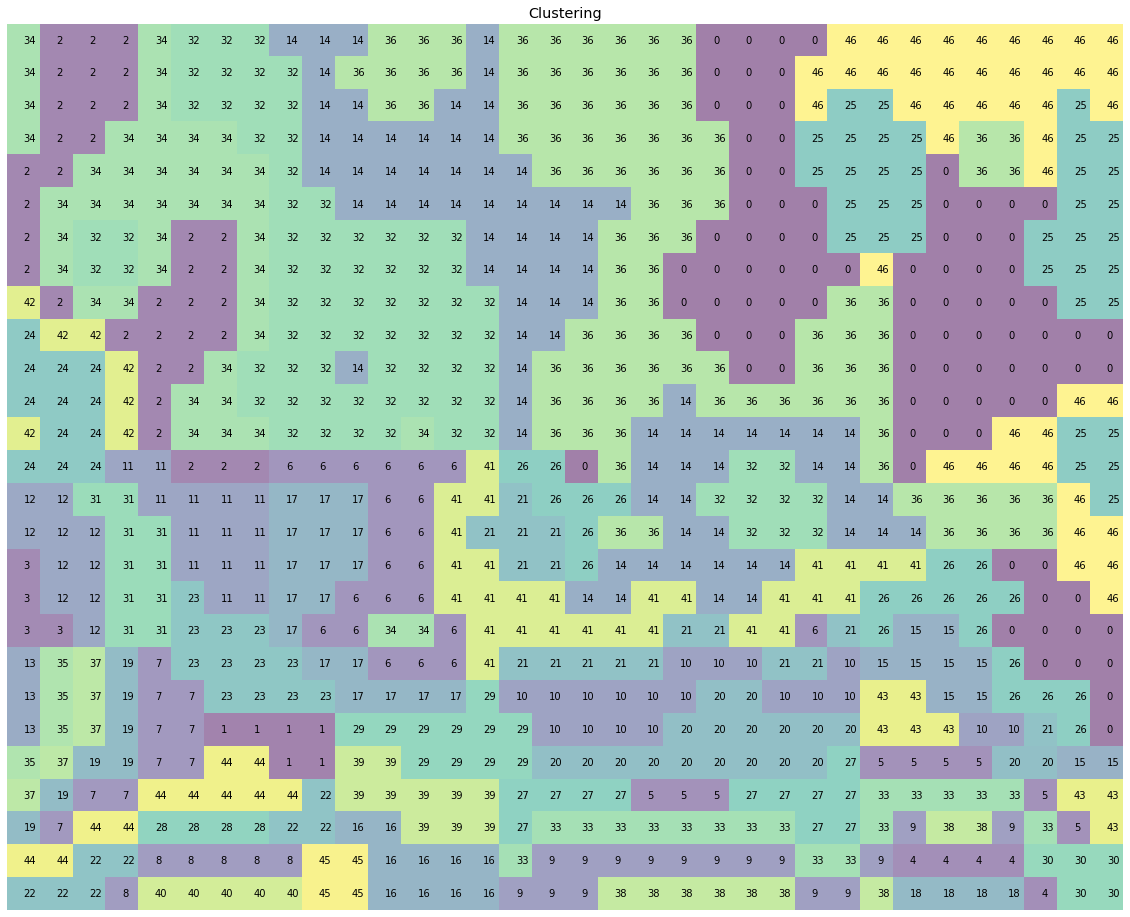

In [9]:
#sm.cluster uses 'elbow' method to find the optimal number of clusters. It calculates SSE for K ranging from 2 to 
#k_end (specified). One can also give directly the optimal number of clusters
K = 50 # stop at this k for SSE sweep
K_opt = 47
[labels, km, norm_data] = sm.cluster(opt=K_opt)
hits  = HitMapView(20,20,"Clustering",text_size=12)
a = hits.show(sm)

In [10]:
df

,DP02_0001PE,DP02_0002PE,DP02_0003PE,DP02_0004PE,DP02_0005PE,DP02_0006PE,DP02_0007PE,DP02_0008PE,DP02_0009PE,DP02_0010PE,...,DP05_0064PE,DP05_0065PE,DP05_0066PE,DP05_0067PE,DP05_0068PE,DP05_0069PE,DP05_0071PE,DP05_0087PE,DP05_0088PE,DP05_0089PE
zip code tabulation area,,,,,,,,,,,,,,,,,,,,,
43964,3811.0,62.5,23.4,47.1,15.4,6.1,2.1,9.3,5.9,37.5,...,96.7,4.2,0.3,0.3,0.1,0.0,0.3,6811.0,48.4,51.6
28216,19911.0,60.3,29.1,33.9,13.8,5.6,3.1,20.8,12.1,39.7,...,28.4,66.4,1.1,2.3,0.0,4.6,8.0,36519.0,44.3,55.7
28277,26695.0,73.1,38.9,62.0,32.6,2.2,1.1,8.9,5.3,26.9,...,74.6,10.3,0.6,16.2,0.0,1.7,7.2,46233.0,46.2,53.8
28278,9176.0,76.1,37.8,60.4,30.0,5.3,3.1,10.4,4.6,23.9,...,59.0,37.0,0.9,6.9,0.7,2.3,10.5,18464.0,46.3,53.7
28303,13207.0,51.9,20.7,34.2,11.6,3.2,1.5,14.5,7.6,48.1,...,53.8,42.3,2.5,5.4,0.8,1.5,10.5,22326.0,48.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98279,340.0,55.9,11.8,51.2,8.2,4.1,3.5,0.6,0.0,44.1,...,97.3,0.5,0.6,1.8,0.0,1.6,3.2,567.0,54.3,45.7
98280,238.0,52.1,8.8,52.1,8.8,0.0,0.0,0.0,0.0,47.9,...,95.2,0.0,0.0,5.5,0.0,0.0,2.9,357.0,46.8,53.2
98311,10146.0,71.8,29.2,54.7,20.3,5.6,2.9,11.4,5.9,28.2,...,81.3,5.1,3.1,13.9,2.8,3.9,9.7,20729.0,51.5,48.5


In [44]:
from tqdm import tqdm
from scipy import spatial
tree = spatial.KDTree(sm.codebook.matrix)
def find_cluster(zipcode):
    node_index = tree.query(df[df.index==zipcode].values.reshape(238,))[1]
    cluster_label = labels[node_index]
    return cluster_label

In [47]:
cluster_labels = []
for zipcode in tqdm(df.index):
    cluster_labels.append(find_cluster(zipcode))

100%|██████████| 33120/33120 [04:02<00:00, 136.45it/s]


In [49]:
df['cluster_labels'] = cluster_labels

In [50]:
df

,DP02_0001PE,DP02_0002PE,DP02_0003PE,DP02_0004PE,DP02_0005PE,DP02_0006PE,DP02_0007PE,DP02_0008PE,DP02_0009PE,DP02_0010PE,...,DP05_0065PE,DP05_0066PE,DP05_0067PE,DP05_0068PE,DP05_0069PE,DP05_0071PE,DP05_0087PE,DP05_0088PE,DP05_0089PE,cluster_labels
zip code tabulation area,,,,,,,,,,,,,,,,,,,,,
43964,3811.0,62.5,23.4,47.1,15.4,6.1,2.1,9.3,5.9,37.5,...,4.2,0.3,0.3,0.1,0.0,0.3,6811.0,48.4,51.6,13
28216,19911.0,60.3,29.1,33.9,13.8,5.6,3.1,20.8,12.1,39.7,...,66.4,1.1,2.3,0.0,4.6,8.0,36519.0,44.3,55.7,18
28277,26695.0,73.1,38.9,62.0,32.6,2.2,1.1,8.9,5.3,26.9,...,10.3,0.6,16.2,0.0,1.7,7.2,46233.0,46.2,53.8,18
28278,9176.0,76.1,37.8,60.4,30.0,5.3,3.1,10.4,4.6,23.9,...,37.0,0.9,6.9,0.7,2.3,10.5,18464.0,46.3,53.7,18
28303,13207.0,51.9,20.7,34.2,11.6,3.2,1.5,14.5,7.6,48.1,...,42.3,2.5,5.4,0.8,1.5,10.5,22326.0,48.0,52.0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98279,340.0,55.9,11.8,51.2,8.2,4.1,3.5,0.6,0.0,44.1,...,0.5,0.6,1.8,0.0,1.6,3.2,567.0,54.3,45.7,13
98280,238.0,52.1,8.8,52.1,8.8,0.0,0.0,0.0,0.0,47.9,...,0.0,0.0,5.5,0.0,0.0,2.9,357.0,46.8,53.2,13
98311,10146.0,71.8,29.2,54.7,20.3,5.6,2.9,11.4,5.9,28.2,...,5.1,3.1,13.9,2.8,3.9,9.7,20729.0,51.5,48.5,18
